In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Load data
df = pd.read_csv('solar_weather.csv')

In [11]:
df = df.rename(columns = {'Energy delta[Wh]':'energy'})
df = df.drop(['Time'], axis=1)
df

,energy,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8


In [12]:
# Data exploration
df.corr()['energy']

energy                    1.000000
GHI                       0.914619
temp                      0.378554
pressure                  0.115219
humidity                 -0.544407
wind_speed                0.029385
rain_1h                  -0.059881
snow_1h                  -0.050914
clouds_all               -0.190241
isSun                     0.526952
sunlightTime              0.437296
dayLength                 0.280695
SunlightTime/daylength    0.402523
weather_type             -0.170046
hour                     -0.080877
month                    -0.049307
Name: energy, dtype: float64

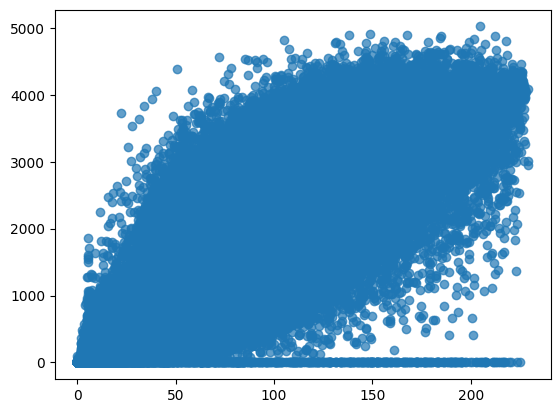

In [13]:
plt.scatter(df.GHI, df.energy, alpha=0.7)
plt.show()

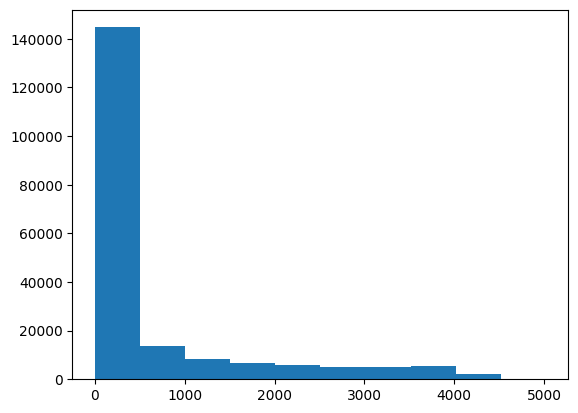

In [14]:
plt.hist(df.energy)
plt.show()

In [15]:
# Data cleaning/preparation
df.isnull().values.any()

False

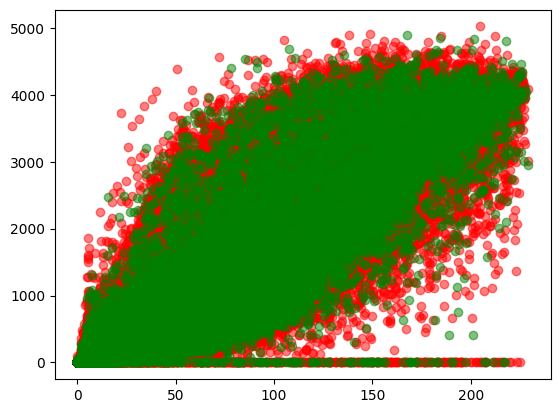

In [16]:
# Data modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['GHI','isSun']]
Y = df[['energy']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

plt.scatter(X_train['GHI'], y_train, color='r', alpha=0.5)
plt.scatter(X_test['GHI'], y_test, color='g', alpha=0.5)
plt.show()

In [17]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [18]:
print('B1, B2= ', LR.coef_)
print('B0= ', LR.intercept_)

B1, B2=  [[ 18.72777132 -71.66791929]]
B0=  [1.72803993e-10]


In [19]:
# Model correction 
predictions = LR.predict(X_test)

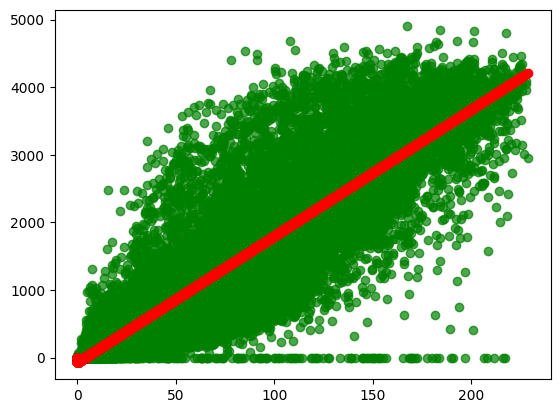

In [20]:
plt.scatter(X_test['GHI'], y_test, color='g', alpha=0.7)
plt.scatter(X_test['GHI'], predictions, color='r')
plt.show()

In [21]:
X_test['energy'] = y_test
X_test['predictions'] = predictions
X_test

,GHI,isSun,energy,predictions
29392,0.0,0,0,1.728040e-10
36143,17.3,1,722,2.523225e+02
165812,0.8,1,0,-5.668570e+01
34438,0.0,0,0,1.728040e-10
104828,0.0,0,0,1.728040e-10
...,...,...,...,...
34057,0.0,0,0,1.728040e-10
80817,0.0,0,0,1.728040e-10
27377,0.0,0,0,1.728040e-10
49711,0.0,0,0,1.728040e-10


In [22]:
X_test.loc[X_test.predictions < 0, "predictions"] = 0
X_test

,GHI,isSun,energy,predictions
29392,0.0,0,0,1.728040e-10
36143,17.3,1,722,2.523225e+02
165812,0.8,1,0,0.000000e+00
34438,0.0,0,0,1.728040e-10
104828,0.0,0,0,1.728040e-10
...,...,...,...,...
34057,0.0,0,0,1.728040e-10
80817,0.0,0,0,1.728040e-10
27377,0.0,0,0,1.728040e-10
49711,0.0,0,0,1.728040e-10


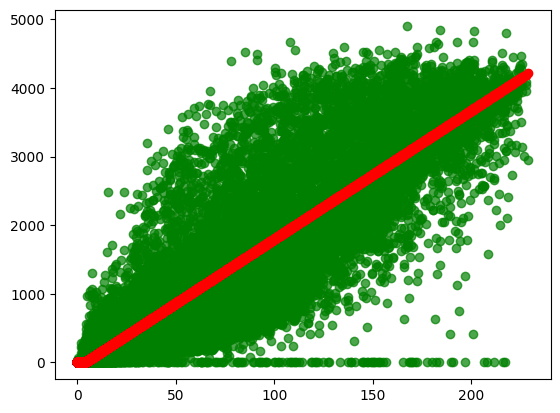

In [23]:
plt.scatter(X_test['GHI'], y_test, color='g', alpha=0.7)
plt.scatter(X_test['GHI'], X_test['predictions'], color='r')
plt.show()

In [24]:
# Error analysis
from sklearn.metrics import mean_absolute_error

In [25]:
MAE = mean_absolute_error(y_test, X_test['predictions'])
MAE

198.44866190507645

In [26]:
df.describe()['energy']

count    196776.000000
mean        573.008228
std        1044.824047
min           0.000000
25%           0.000000
50%           0.000000
75%         577.000000
max        5020.000000
Name: energy, dtype: float64

In [27]:
df.energy.value_counts().sort_values(ascending=False)[df.energy.value_counts() > 50]

energy
0      100850
2         260
5         254
15        228
30        227
        ...  
296        51
423        51
595        51
372        51
564        51
Name: count, Length: 403, dtype: int64

In [28]:
test = X_test[X_test.energy == 296].copy()
test

,GHI,isSun,energy,predictions
96314,4.4,1,296,10.734275
174865,35.4,1,296,591.295186
121317,49.3,1,296,851.611207
12162,60.1,1,296,1053.871137
149248,36.8,1,296,617.514065
116511,29.2,1,296,475.183003
23450,22.2,1,296,344.088604
88821,22.8,1,296,355.325267
59736,29.8,1,296,486.419666
142401,9.4,1,296,104.373131


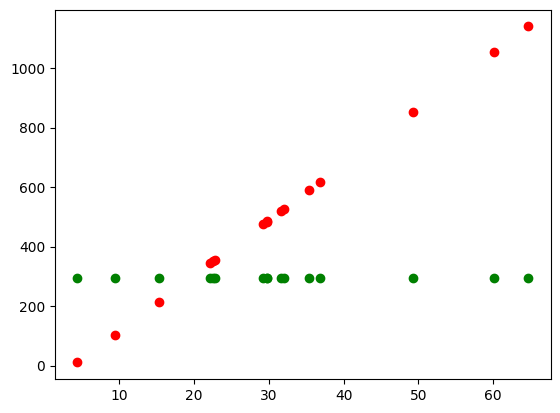

In [29]:
plt.scatter(test.GHI, test.predictions, color='r')
plt.scatter(test.GHI, test.energy, color='g')
plt.show()

In [37]:
X_test['error'] = (X_test['predictions'] - X_test['energy']).abs()
X_test

,GHI,isSun,energy,predictions,error
29392,0.0,0,0,1.728040e-10,1.728040e-10
36143,17.3,1,722,2.523225e+02,4.696775e+02
165812,0.8,1,0,0.000000e+00,0.000000e+00
34438,0.0,0,0,1.728040e-10,1.728040e-10
104828,0.0,0,0,1.728040e-10,1.728040e-10
...,...,...,...,...,...
34057,0.0,0,0,1.728040e-10,1.728040e-10
80817,0.0,0,0,1.728040e-10,1.728040e-10
27377,0.0,0,0,1.728040e-10,1.728040e-10
49711,0.0,0,0,1.728040e-10,1.728040e-10


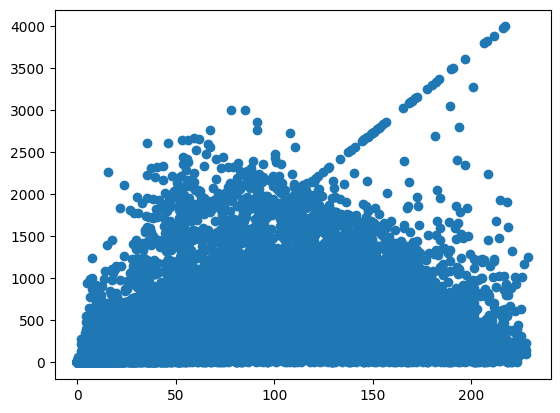

In [40]:
plt.scatter(X_test.GHI, X_test.error)
plt.show()

In [47]:
error_by_GHI = X_test.error.groupby(X_test.GHI).mean()
error_by_GHI

GHI
0.0         0.014535
0.1         2.067308
0.2         2.682927
0.3         3.000000
0.4         4.557692
            ...     
226.9    1172.663394
227.5     103.900057
227.6     227.772834
227.9     153.391166
228.9    1259.118937
Name: error, Length: 2183, dtype: float64

In [66]:
energy_by_GHI = X_test.energy.groupby(X_test.GHI).mean()

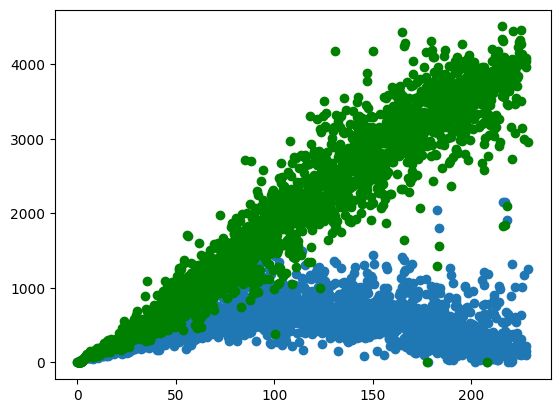

In [68]:
plt.scatter(error_by_GHI.keys(), error_by_GHI)
plt.scatter(error_by_GHI.keys(), energy_by_GHI, color='g')
plt.show()

In [69]:
error_ratio = error_by_GHI / energy_by_GHI
error_ratio

GHI
0.0      1.000000
0.1      1.000000
0.2      1.000000
0.3      1.000000
0.4      1.000000
           ...   
226.9    0.390237
227.5    0.025435
227.6    0.057475
227.9    0.037940
228.9    0.425954
Length: 2183, dtype: float64

In [70]:
error_ratio = error_ratio[np.isfinite(error_ratio)]

<Axes: ylabel='Frequency'>

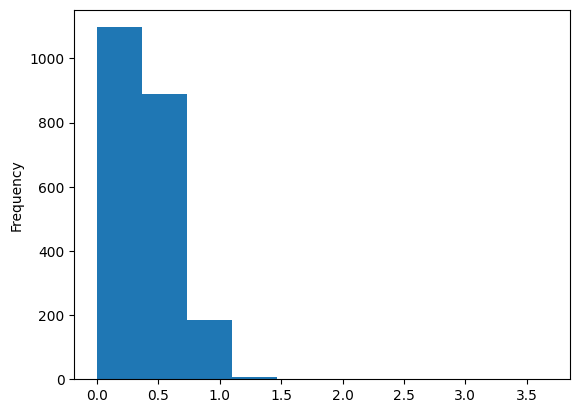

In [73]:
error_ratio.plot.hist()

In [75]:
error_ratio.sort_values()

GHI
178.2    0.000422
201.9    0.001220
220.2    0.001282
207.9    0.002652
218.4    0.003107
           ...   
123.3    1.235231
60.6     1.318100
62.9     1.323636
182.5    1.581906
100.5    3.672189
Length: 2181, dtype: float64

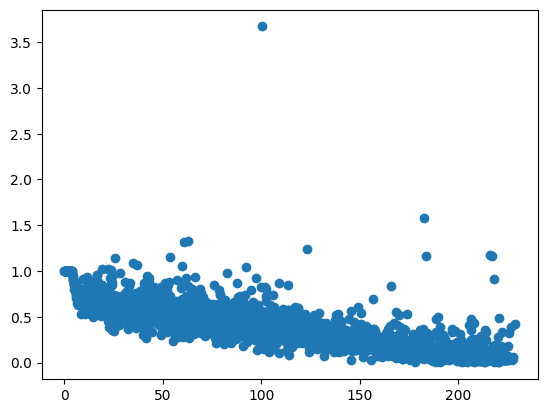

In [77]:
plt.scatter(error_ratio.keys(), error_ratio)
plt.show()